# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# Your code here
data = pd.read_csv('data_all.csv')

data.head(10)

e    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  36.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  
7  0.0  0.0  0.0  0.0  0.0  0.0  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 785 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [4]:
data['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

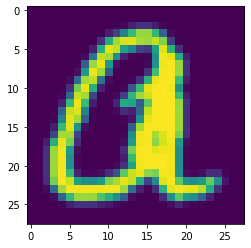

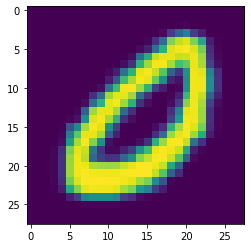

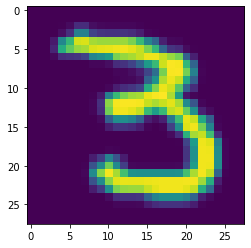

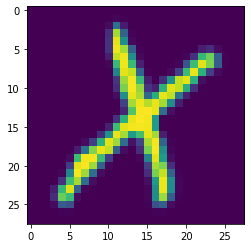

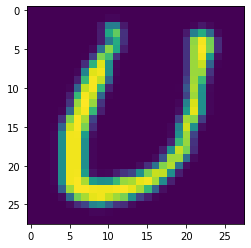

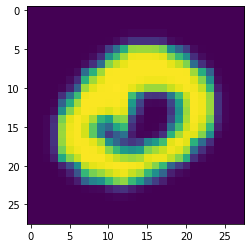

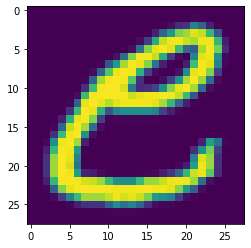

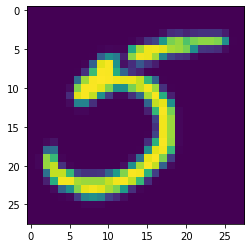

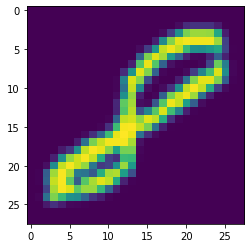

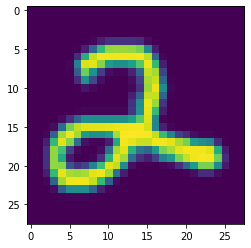

In [5]:
for i in range(10):
    fig, ax = plt.subplots()
    ax.imshow(np.asarray(data.iloc[i,1:]).reshape(28,28), interpolation='nearest')


<ipython-input-6-2351832260bc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


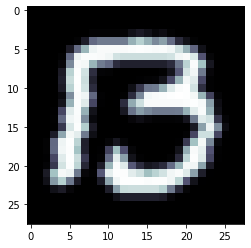

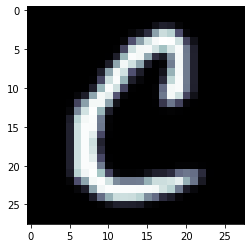

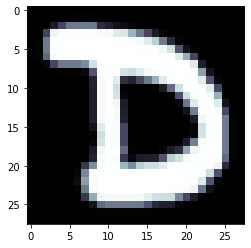

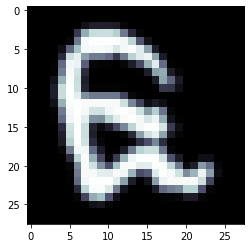

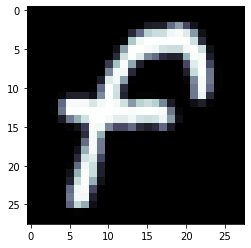

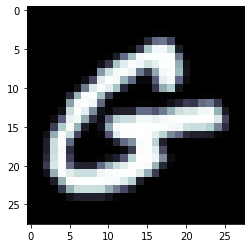

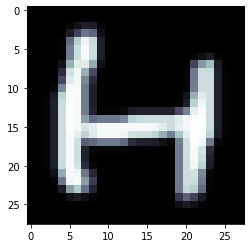

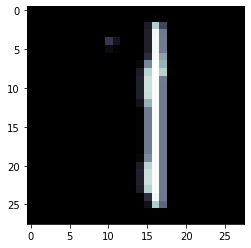

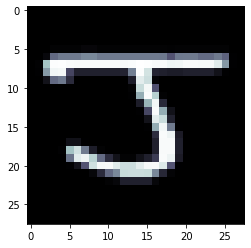

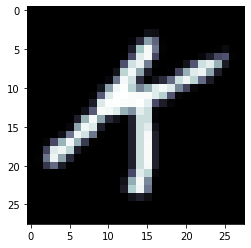

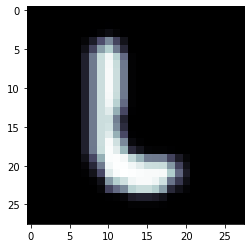

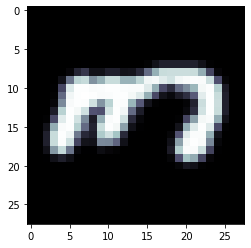

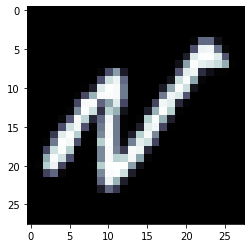

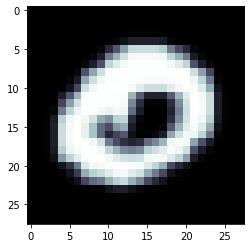

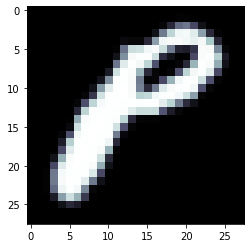

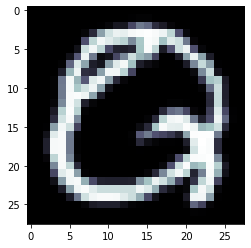

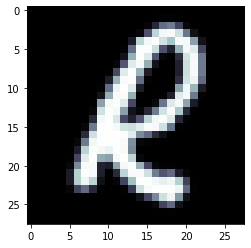

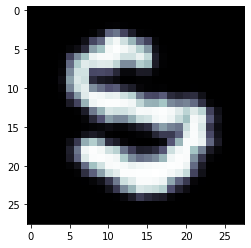

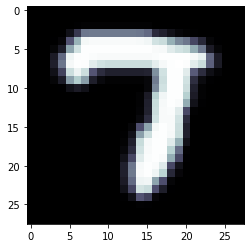

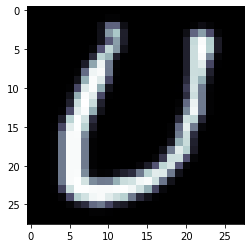

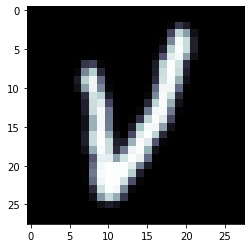

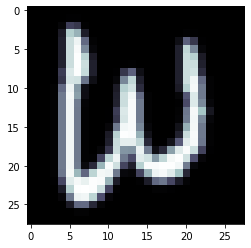

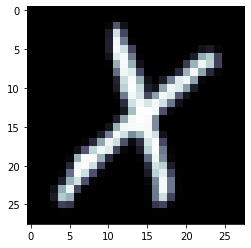

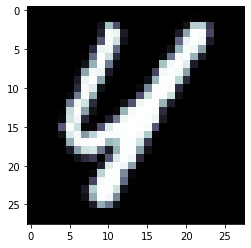

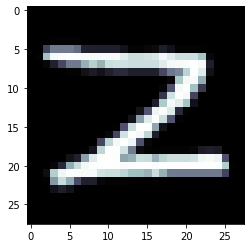

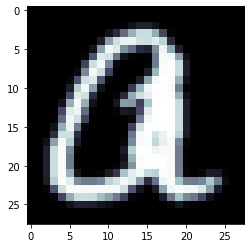

In [6]:
for i in range(11,37):
    fig, ax = plt.subplots()
    ax.imshow(np.asarray(data[data.e==int(i)].iloc[0,1:]).reshape(28,28), cmap=plt.cm.bone, interpolation='nearest')

In [7]:
#0-9 numbers
#10-35 upper
#36-50 lower

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [27]:
# Your code here
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [9]:
"""
A PCA was applied to the original data using Colab due to the memory limitations of my PC. The following code was used:

    from google.colab import drive
    drive.mount('/content/drive/')
    data = pd.read_csv('/content/drive/MyDrive/Datasets/data_all.csv')
    data_upper = data.copy()
    data_upper = data_upper.drop('e', axis=1, inplace=False)
    data_upper.head()
    pca = PCA()
    pca.fit(data_upper)
    pca.n_components_
    plt.figure(figsize=(12, 9))
    plt.plot(range(1, 785), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('Varianza explicada por los componentes')
    plt.xlabel('Numero de componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    
    From the graph plotted with the last command I concluded that the first 50 components explained the 80% of our data.
    
    pca = PCA(n_components=50)
    pca.fit(np.array(data_upper))
    df_pca_comp = pd.DataFrame(data=pca.transform(np.array(data_upper)))
    df_pca_comp.to_csv('data_pca.csv')
"""

"\nA PCA was applied to the original data using Colab due to the memory limitations of my PC. The following code was used:\n\n    from google.colab import drive\n    drive.mount('/content/drive/')\n    data = pd.read_csv('/content/drive/MyDrive/Datasets/data_all.csv')\n    data_upper = data.copy()\n    data_upper = data_upper.drop('e', axis=1, inplace=False)\n    data_upper.head()\n    pca = PCA()\n    pca.fit(data_upper)\n    pca.n_components_\n    plt.figure(figsize=(12, 9))\n    plt.plot(range(1, 785), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')\n    plt.title('Varianza explicada por los componentes')\n    plt.xlabel('Numero de componentes')\n    plt.ylabel('Varianza Explicada Acumulada')\n    \n    From the graph plotted with the last command I concluded that the first 50 components explained the 80% of our data.\n    \n    pca = PCA(n_components=50)\n    pca.fit(np.array(data_upper))\n    df_pca_comp = pd.DataFrame(data=pca.transform(np.array(data_upper)))\

In [10]:
data_pca = pd.read_csv('data_pca.csv', index_col=0)

In [11]:
data_pca.head()

0           1           2           3           4           5  \
0   117.989935  658.487571  330.402267  447.344406   71.579701 -321.068125   
1  1054.668582 -185.312286 -896.186133 -424.796355 -892.301689  153.224872   
2  -117.762147  781.021125  143.518022 -152.470980  562.498207  -62.177398   
3  -553.267526 -283.911249    8.845921   92.506575 -245.986626 -137.806753   
4   804.201239   21.239381  834.426463 -537.244042 -393.108762  461.381428   

            6           7           8           9  ...          40  \
0 -722.193289  216.586104 -296.320421  409.989741  ...  102.477667   
1  -24.147293  164.114933 -341.850783 -123.135346  ...   20.951861   
2  241.489107  475.198097 -867.948127   -1.573298  ...  -65.988978   
3  202.621867  221.518277   50.877987  267.818437  ...  -64.017097   
4  -30.000237  -68.474969  338.573024  191.333625  ... -212.737601   

           41          42          43          44          45          46  \
0   79.787928  229.692127  213.362256 -153.993241  166.156587  127.762666   
1 -229.714627 -116.688314  -36.820065  -26.848551  -86.944919  140.027855   
2 -180.374379  220.651482  -41.768814 -139.201120  302.111079  -50.122665   
3   -6.827408 -312.128894   82.664625 -249.716617  302.844756 -116.076716   
4 -198.733705   13.946497   43.304405 -208.758342   52.693623   88.726353   

           47          48          49  
0  -89.816663 -175.166099   49.813899  
1  138.466243  -12.851232   54.393574  
2  115.465053 -101.499678  116.537031  
3 -362.312861    6.377074  106.466476  
4  180.408897   87.096814  107.168310  

[5 rows x 50 columns]

In [12]:
data_pca_e = pd.concat([data['e'], data_pca], axis=1)

In [13]:
data_pca_e.head()

e            0           1           2           3           4  \
0  36.0   117.989935  658.487571  330.402267  447.344406   71.579701   
1   0.0  1054.668582 -185.312286 -896.186133 -424.796355 -892.301689   
2   3.0  -117.762147  781.021125  143.518022 -152.470980  562.498207   
3  33.0  -553.267526 -283.911249    8.845921   92.506575 -245.986626   
4  30.0   804.201239   21.239381  834.426463 -537.244042 -393.108762   

            5           6           7           8  ...          40  \
0 -321.068125 -722.193289  216.586104 -296.320421  ...  102.477667   
1  153.224872  -24.147293  164.114933 -341.850783  ...   20.951861   
2  -62.177398  241.489107  475.198097 -867.948127  ...  -65.988978   
3 -137.806753  202.621867  221.518277   50.877987  ...  -64.017097   
4  461.381428  -30.000237  -68.474969  338.573024  ... -212.737601   

           41          42          43          44          45          46  \
0   79.787928  229.692127  213.362256 -153.993241  166.156587  127.762666   
1 -229.714627 -116.688314  -36.820065  -26.848551  -86.944919  140.027855   
2 -180.374379  220.651482  -41.768814 -139.201120  302.111079  -50.122665   
3   -6.827408 -312.128894   82.664625 -249.716617  302.844756 -116.076716   
4 -198.733705   13.946497   43.304405 -208.758342   52.693623   88.726353   

           47          48          49  
0  -89.816663 -175.166099   49.813899  
1  138.466243  -12.851232   54.393574  
2  115.465053 -101.499678  116.537031  
3 -362.312861    6.377074  106.466476  
4  180.408897   87.096814  107.168310  

[5 rows x 51 columns]

In [14]:
def replace_e(number):
    if number < 10:
        return 0
    elif number >= 10 and number < 36:
        return 1
    elif number >= 36:
        return 0

In [15]:
data_upper = data_pca_e.copy()

In [16]:
data_upper['e'] = data_upper['e'].apply(replace_e)

In [17]:
data_upper.head()

e            0           1           2           3           4           5  \
0  0   117.989935  658.487571  330.402267  447.344406   71.579701 -321.068125   
1  0  1054.668582 -185.312286 -896.186133 -424.796355 -892.301689  153.224872   
2  0  -117.762147  781.021125  143.518022 -152.470980  562.498207  -62.177398   
3  1  -553.267526 -283.911249    8.845921   92.506575 -245.986626 -137.806753   
4  1   804.201239   21.239381  834.426463 -537.244042 -393.108762  461.381428   

            6           7           8  ...          40          41  \
0 -722.193289  216.586104 -296.320421  ...  102.477667   79.787928   
1  -24.147293  164.114933 -341.850783  ...   20.951861 -229.714627   
2  241.489107  475.198097 -867.948127  ...  -65.988978 -180.374379   
3  202.621867  221.518277   50.877987  ...  -64.017097   -6.827408   
4  -30.000237  -68.474969  338.573024  ... -212.737601 -198.733705   

           42          43          44          45          46          47  \
0  229.692127  213.362256 -153.993241  166.156587  127.762666  -89.816663   
1 -116.688314  -36.820065  -26.848551  -86.944919  140.027855  138.466243   
2  220.651482  -41.768814 -139.201120  302.111079  -50.122665  115.465053   
3 -312.128894   82.664625 -249.716617  302.844756 -116.076716 -362.312861   
4   13.946497   43.304405 -208.758342   52.693623   88.726353  180.408897   

           48          49  
0 -175.166099   49.813899  
1  -12.851232   54.393574  
2 -101.499678  116.537031  
3    6.377074  106.466476  
4   87.096814  107.168310  

[5 rows x 51 columns]

In [18]:
X = data_upper.drop('e', axis=1)
y = data_upper['e']

In [21]:
def desicion_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    params = {'random_state': 0, 'max_depth': 4}
    tree_characters= DecisionTreeClassifier(**params)
    tree_characters.fit(X_train, y_train)
    y_predict = tree_characters.predict(X_test)
    print(tree_characters.score(X_train, y_train), tree_characters.score(X_test, y_test))
    return tree_characters, y_predict

In [22]:
tree_upper, y_predict = desicion_tree(X, y)

0.7404923863868381 0.7403395658714808


In [28]:
def random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    tree_characters= RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
    tree_characters.fit(X_train, y_train)
    y_predict = tree_characters.predict(X_test)
    print(tree_characters.score(X_train, y_train), tree_upper.score(X_test, y_test))
    return tree_characters, y_predict

In [29]:
tree_upper, y_predict = random_forest(X, y)

0.7304985116648935 0.7403395658714808


In [30]:
def logi_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(lr.score(X_train, y_train), tree_upper.score(X_test, y_test))
    return lr, y_predict

In [31]:
lr, y_predict = logi_regression(X, y)

0.7381819744887542 0.7308403180743607


* Try to do the same thing with lowercases.

In [32]:
# Your code here
def replace_e_lower(number):
    if number >= 36 and number <= 50:
        return 1
    else:
        return 0

In [33]:
data_lower = data_pca_e.copy()
data_lower['e'] = data_lower['e'].apply(replace_e_lower)

In [34]:
X = data_lower.drop('e', axis=1)
y = data_lower['e']

In [35]:
tree_lower, y_predict = desicion_tree(X, y)

0.8554864223003106 0.8562217923920051


In [36]:
tree_lower, y_predict = random_forest(X, y)

0.8477814672727468 0.8562217923920051


In [37]:
lr, y_predict = logi_regression(X, y)

0.8600750077909238 0.8483129163980228


* Try to do the same thing with numbers.

In [38]:
# Your code here
def replace_e_number(number):
    if number >= 0 and number <= 9:
        return 1
    else:
        return 0

In [39]:
data_number = data_pca_e.copy()
data_number['e'] = data_number['e'].apply(replace_e_number)

In [40]:
X = data_number.drop('e', axis=1)
y = data_number['e']

In [41]:
tree_number, y_predict = desicion_tree(X, y)

0.6859666655920564 0.6845046206748334


In [42]:
tree_number, y_predict = random_forest(X, y)

0.7230622091836186 0.5022995916612938


In [43]:
lr, y_predict = logi_regression(X, y)

0.7249857614150467 0.5022995916612938
